# **Ciencia de Datos 2021**

### Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Load data

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']

In [3]:
colors = {0:'red', 1:'blue', 2:'green'}
c = []
for i in range(0, len(y)):
    c.append(colors[y[i]])

In [4]:
# variables
u = 2
v = 3

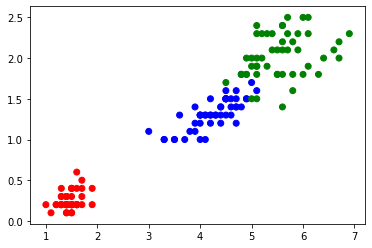

In [5]:
plt.figure()
plt.scatter(X[:,u], X[:,v], c=c)
plt.show()

In [6]:
# separamos en clases 0, 1, 2
y0 = np.argwhere(y==0)
y1 = np.argwhere(y==1)
y2 = np.argwhere(y==2)

X0 = X[y0]
X1 = X[y1]
X2 = X[y2]

# extract class 0 and 1
X01 = np.vstack([X0,X1]).reshape(-1,4)
y01 = np.stack(np.array(50*[0] + 50*[1]))

# extract class 1 and 2
X12 = np.vstack([X1,X2]).reshape(-1,4)
y12 = np.stack(np.array(50*[0] + 50*[1]))

In [7]:
print(X.shape, y.shape)
print(X01.shape, y01.shape)
print(X12.shape, y12.shape)

(150, 4) (150,)
(100, 4) (100,)
(100, 4) (100,)


In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, train_size=0.8, stratify=y,
                                                random_state=2021)

In [9]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(120, 4) (30, 4) (120,) (30,)


# Random Forest

## Ensemble Random Forest

In [10]:
model = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=2,
                               bootstrap=True, random_state=None)

In [11]:
model.fit(X[:,[u,v]], y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
model.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=500536178, splitter='best')

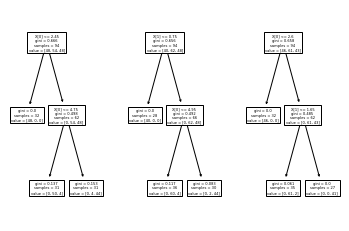

In [13]:
# plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_tree(model.estimators_[0])
plt.subplot(1,3,2)
plot_tree(model.estimators_[1])
plt.subplot(1,3,3)
plot_tree(model.estimators_[2])
plt.show()

In [14]:
yhat = model.predict(X[:,[u,v]])
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
cfmatrix = confusion_matrix(y, yhat)
print(cfmatrix)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


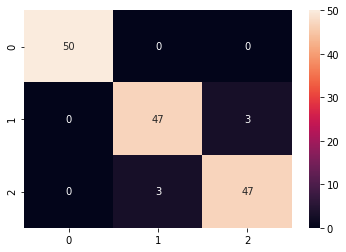

In [16]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [17]:
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [18]:
# Plotting decision regions
h = 0.01
x_min, x_max = X[:,u].min() - 1, X[:,u].max() + 1
y_min, y_max = X[:,v].min() - 1, X[:,v].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

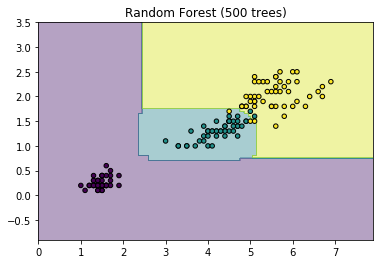

In [19]:
# plt.figure(figsize=(8,8))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,u], X[:,v], c=y, s=20, edgecolor='k')
plt.title('Random Forest (500 trees)')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

## Ada Boosting

In [20]:
alpha = 0.1
treemodel = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=None)

Adamodel = AdaBoostClassifier(base_estimator=treemodel, n_estimators=500, 
                              learning_rate=alpha, random_state=None)

In [21]:
Adamodel.fit(X[:,[u,v]], y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [22]:
Adamodel.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1589778380, splitter='best')

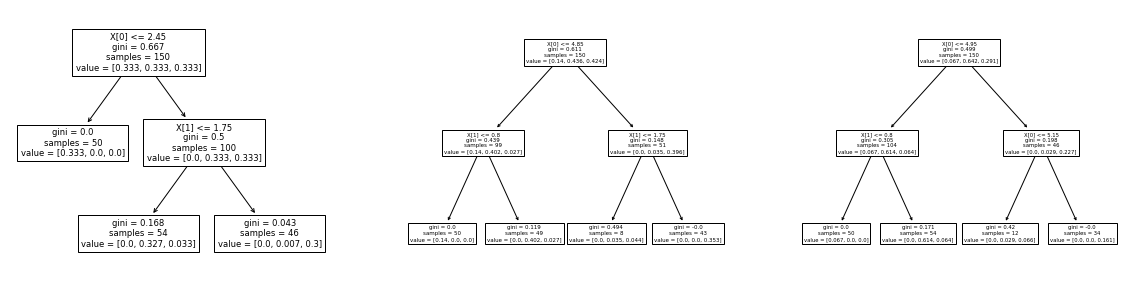

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_tree(Adamodel.estimators_[0])
plt.subplot(1,3,2)
plot_tree(Adamodel.estimators_[1])
plt.subplot(1,3,3)
plot_tree(Adamodel.estimators_[2])
plt.show()

In [24]:
yhat = Adamodel.predict(X[:,[u,v]])
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [25]:
cfmatrix = confusion_matrix(y, yhat)
print(cfmatrix)

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


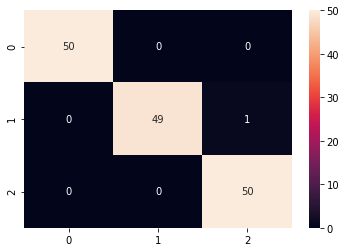

In [26]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [27]:
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [28]:
# Plotting decision regions
h = 0.01
x_min, x_max = X[:,u].min() - 1, X[:,u].max() + 1
y_min, y_max = X[:,v].min() - 1, X[:,v].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

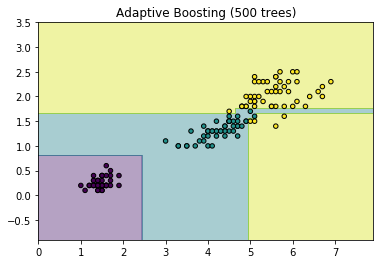

In [29]:
# plt.figure(figsize=(8,8))
Z = Adamodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,u], X[:,v], c=y, s=20, edgecolor='k')
plt.title('Adaptive Boosting (500 trees)')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

## Gradient Boosting

In [30]:
alpha = 0.1
Gradmodel = GradientBoostingClassifier(n_estimators=500, subsample=0.9,
                                       learning_rate=alpha, random_state=None)

In [31]:
Gradmodel.fit(X[:,[u,v]], y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
Gradmodel.estimators_[0][0]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7F4E8AFA8150,
                      splitter='best')

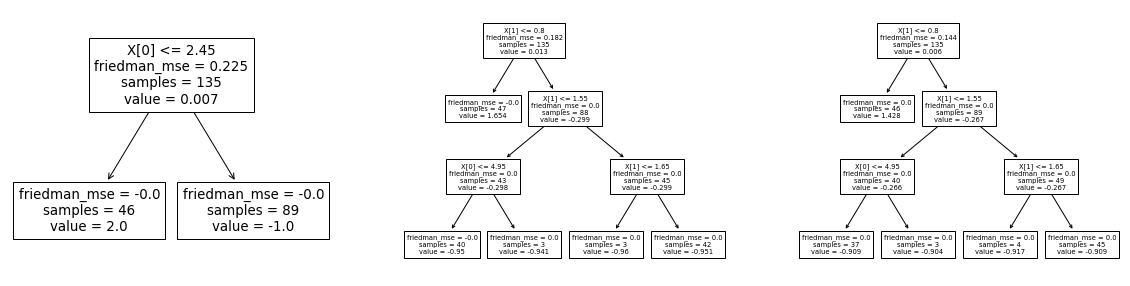

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_tree(Gradmodel.estimators_[0][0])
plt.subplot(1,3,2)
plot_tree(Gradmodel.estimators_[1][0])
plt.subplot(1,3,3)
plot_tree(Gradmodel.estimators_[2][0])
plt.show()

In [34]:
yhat = Gradmodel.predict(X[:,[u,v]])
print(yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [35]:
cfmatrix = confusion_matrix(y, yhat)
print(cfmatrix)

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


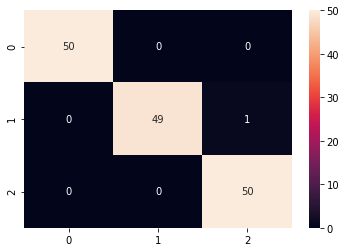

In [36]:
plt.figure()
sns.heatmap(cfmatrix, annot=True)
plt.show()

In [37]:
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       0.98      1.00      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [38]:
# Plotting decision regions
h = 0.01
x_min, x_max = X[:,u].min() - 1, X[:,u].max() + 1
y_min, y_max = X[:,v].min() - 1, X[:,v].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

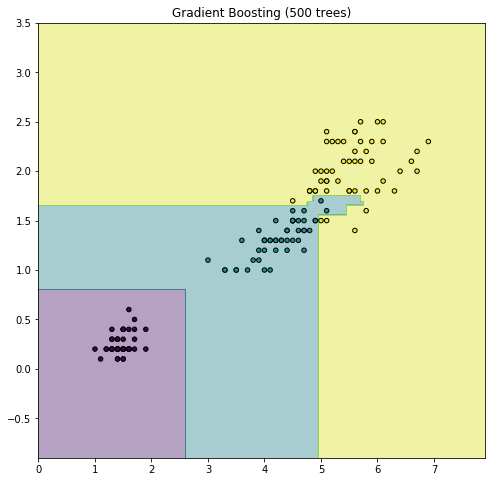

In [39]:
plt.figure(figsize=(8,8))
Z = Gradmodel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,u], X[:,v], c=y, s=20, edgecolor='k')
plt.title('Gradient Boosting (500 trees)')
#plt.h([0,0], w, 'k-')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
plt.show()

# Comparación

In [40]:
alpha = 0.1
D = 3
N = 200

In [41]:
RF =  RandomForestClassifier(n_estimators=N, criterion='gini', max_depth=D,
                             bootstrap=True, random_state=None)

treemodel = DecisionTreeClassifier(criterion='gini', max_depth=D, random_state=None)

Ada = AdaBoostClassifier(base_estimator=treemodel, n_estimators=N,
                         learning_rate=alpha, random_state=None)

Grad = GradientBoostingClassifier(n_estimators=N, subsample=0.9, max_depth=D,
                                  learning_rate=alpha, random_state=None)

In [42]:
RF.fit(Xtrain, Ytrain)
Ada.fit(Xtrain, Ytrain)
Grad.fit(Xtrain, Ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

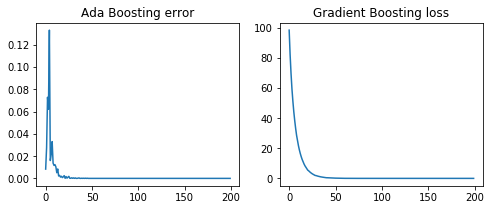

In [43]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(Ada.estimator_errors_)
plt.title('Ada Boosting error')
plt.subplot(1,2,2)
plt.plot(Grad.train_score_)
plt.title('Gradient Boosting loss')
plt.show()

In [44]:
yRF = RF.predict(Xtest)
yAD = Ada.predict(Xtest)
yGR = Grad.predict(Xtest)

In [45]:
RFcm = confusion_matrix(Ytest, yRF)
ADcm = confusion_matrix(Ytest, yAD)
GRcm = confusion_matrix(Ytest, yGR)

In [46]:
print(RFcm, '\n')
print(ADcm, '\n')
print(GRcm)

[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]] 

[[10  0  0]
 [ 0  8  2]
 [ 0  3  7]] 

[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


In [47]:
print(classification_report(Ytest, yRF), '\n')
print(classification_report(Ytest, yAD), '\n')
print(classification_report(Ytest, yGR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.73      0.80      0.76        10
           2       0.78      0.70      0.74        10

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy    

## Feature importances

In [50]:
def plot_importances(model, features, modelname='Model', fsz=(5,5)):
    #for name, importance in zip(names, model.feature_importances_):
    #    print(name, "=", importance)
    imp = model.feature_importances_
    idx = np.argsort(imp)
    plt.figure(figsize=fsz)
    plt.title('{} Feature Importances'.format(modelname))
    plt.barh(range(len(idx)), imp[idx], color='b', align='center')
    plt.yticks(range(len(idx)), [features[i] for i in idx])
    plt.xlabel('Relative Importance')
    plt.show()

In [51]:
names = iris.feature_names

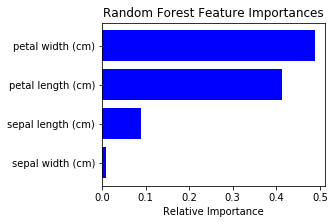

In [52]:
plot_importances(RF, names, modelname='Random Forest', fsz=(4,3))

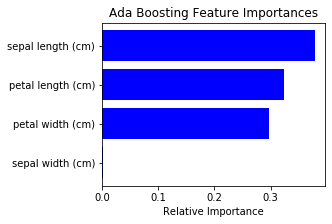

In [53]:
plot_importances(Ada, names, modelname='Ada Boosting', fsz=(4,3))

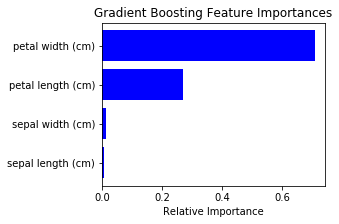

In [54]:
plot_importances(Grad, names, modelname='Gradient Boosting', fsz=(4,3))